# Exploratory Data Analysis

## Introduction
Health risks for pregnant patients could be attributed to a variety of health conditions such as blood pressurem age, heart rate etc. Here data has been collected from different healthcare facilities through the Internet-of-Things-based risk monitoring system (data source: Maternal Health Risk DataMaternal Health Risk Data).

The objective of the analysis is to answer the following questions:

What is the age distribution of the patients?
What are the key factors that can predict pregnant health risk level?

In [1]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [2]:
month1_df = pd.read_csv('month1_data.csv')
month2_df = pd.read_csv('month2_data.csv')

## Month 1 dataset

### Data preprocessing

In [3]:
month1_df.head()

,index,month_no,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0,1,25,130,80,15.0,98.0,86,high risk
1,1,1,35,140,90,13.0,98.0,70,high risk
2,2,1,29,90,70,8.0,100.0,80,high risk
3,3,1,30,140,85,7.0,98.0,70,high risk
4,4,1,35,120,60,6.1,98.0,76,low risk


In [4]:
# Checking for the null value.

print(month1_df.isna().sum())

# Counting the number of null values.
print(month1_df.isna().sum().sum())

index          0
month_no       0
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
0


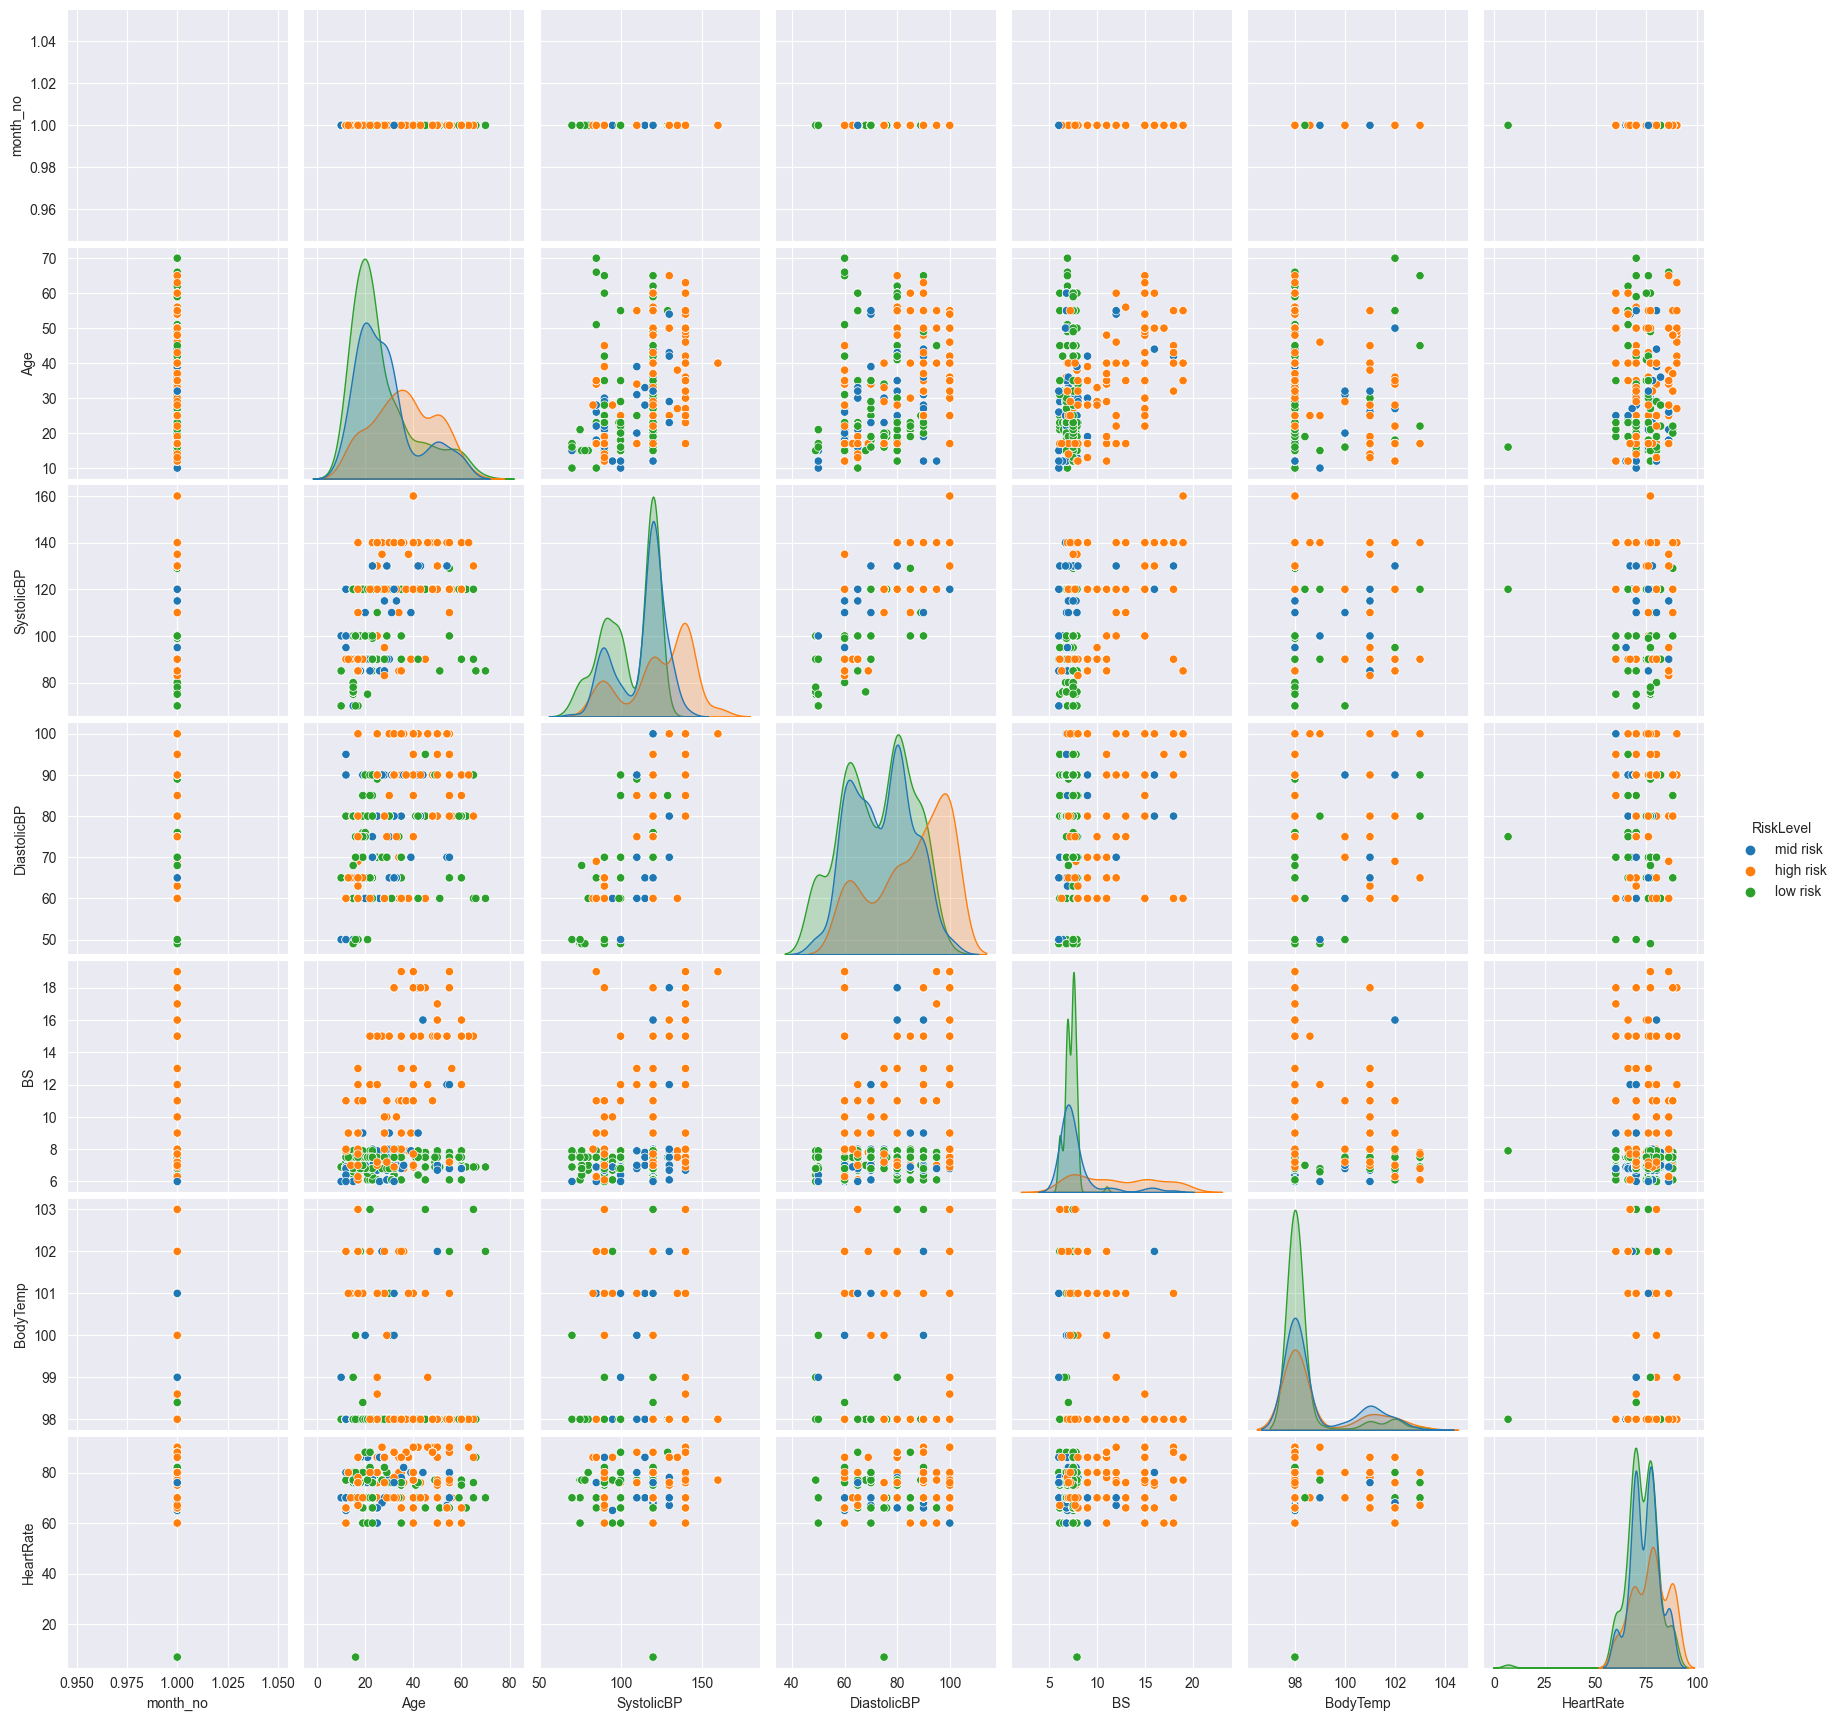

In [5]:
sns.set_style('darkgrid')
cols_to_plot = list(month1_df.columns)
cols_to_plot.remove("index")
sns.pairplot(month1_df[cols_to_plot], diag_kws={'color':'#03C988'}, hue="RiskLevel", hue_order=["mid risk", "high risk", "low risk"])

### Decision Tree Classification

In [6]:
risk_level_dict = {"low risk": 0, "mid risk": 1, "high risk": 2}

In [7]:
# change the values is the RiskLevel column to 0, 1, 2
month1_df['RiskLevel'] = month1_df['RiskLevel'].map(risk_level_dict)

In [8]:
# Independent variables (drop index_col).

X = month1_df.drop(['index', 'RiskLevel',"month_no"], axis=1).values
# print("X:\n", X)

# Dependent variable.
y = month1_df['RiskLevel'].values
# print("y:\n", y)

Accuracy: 0.7093596059113301


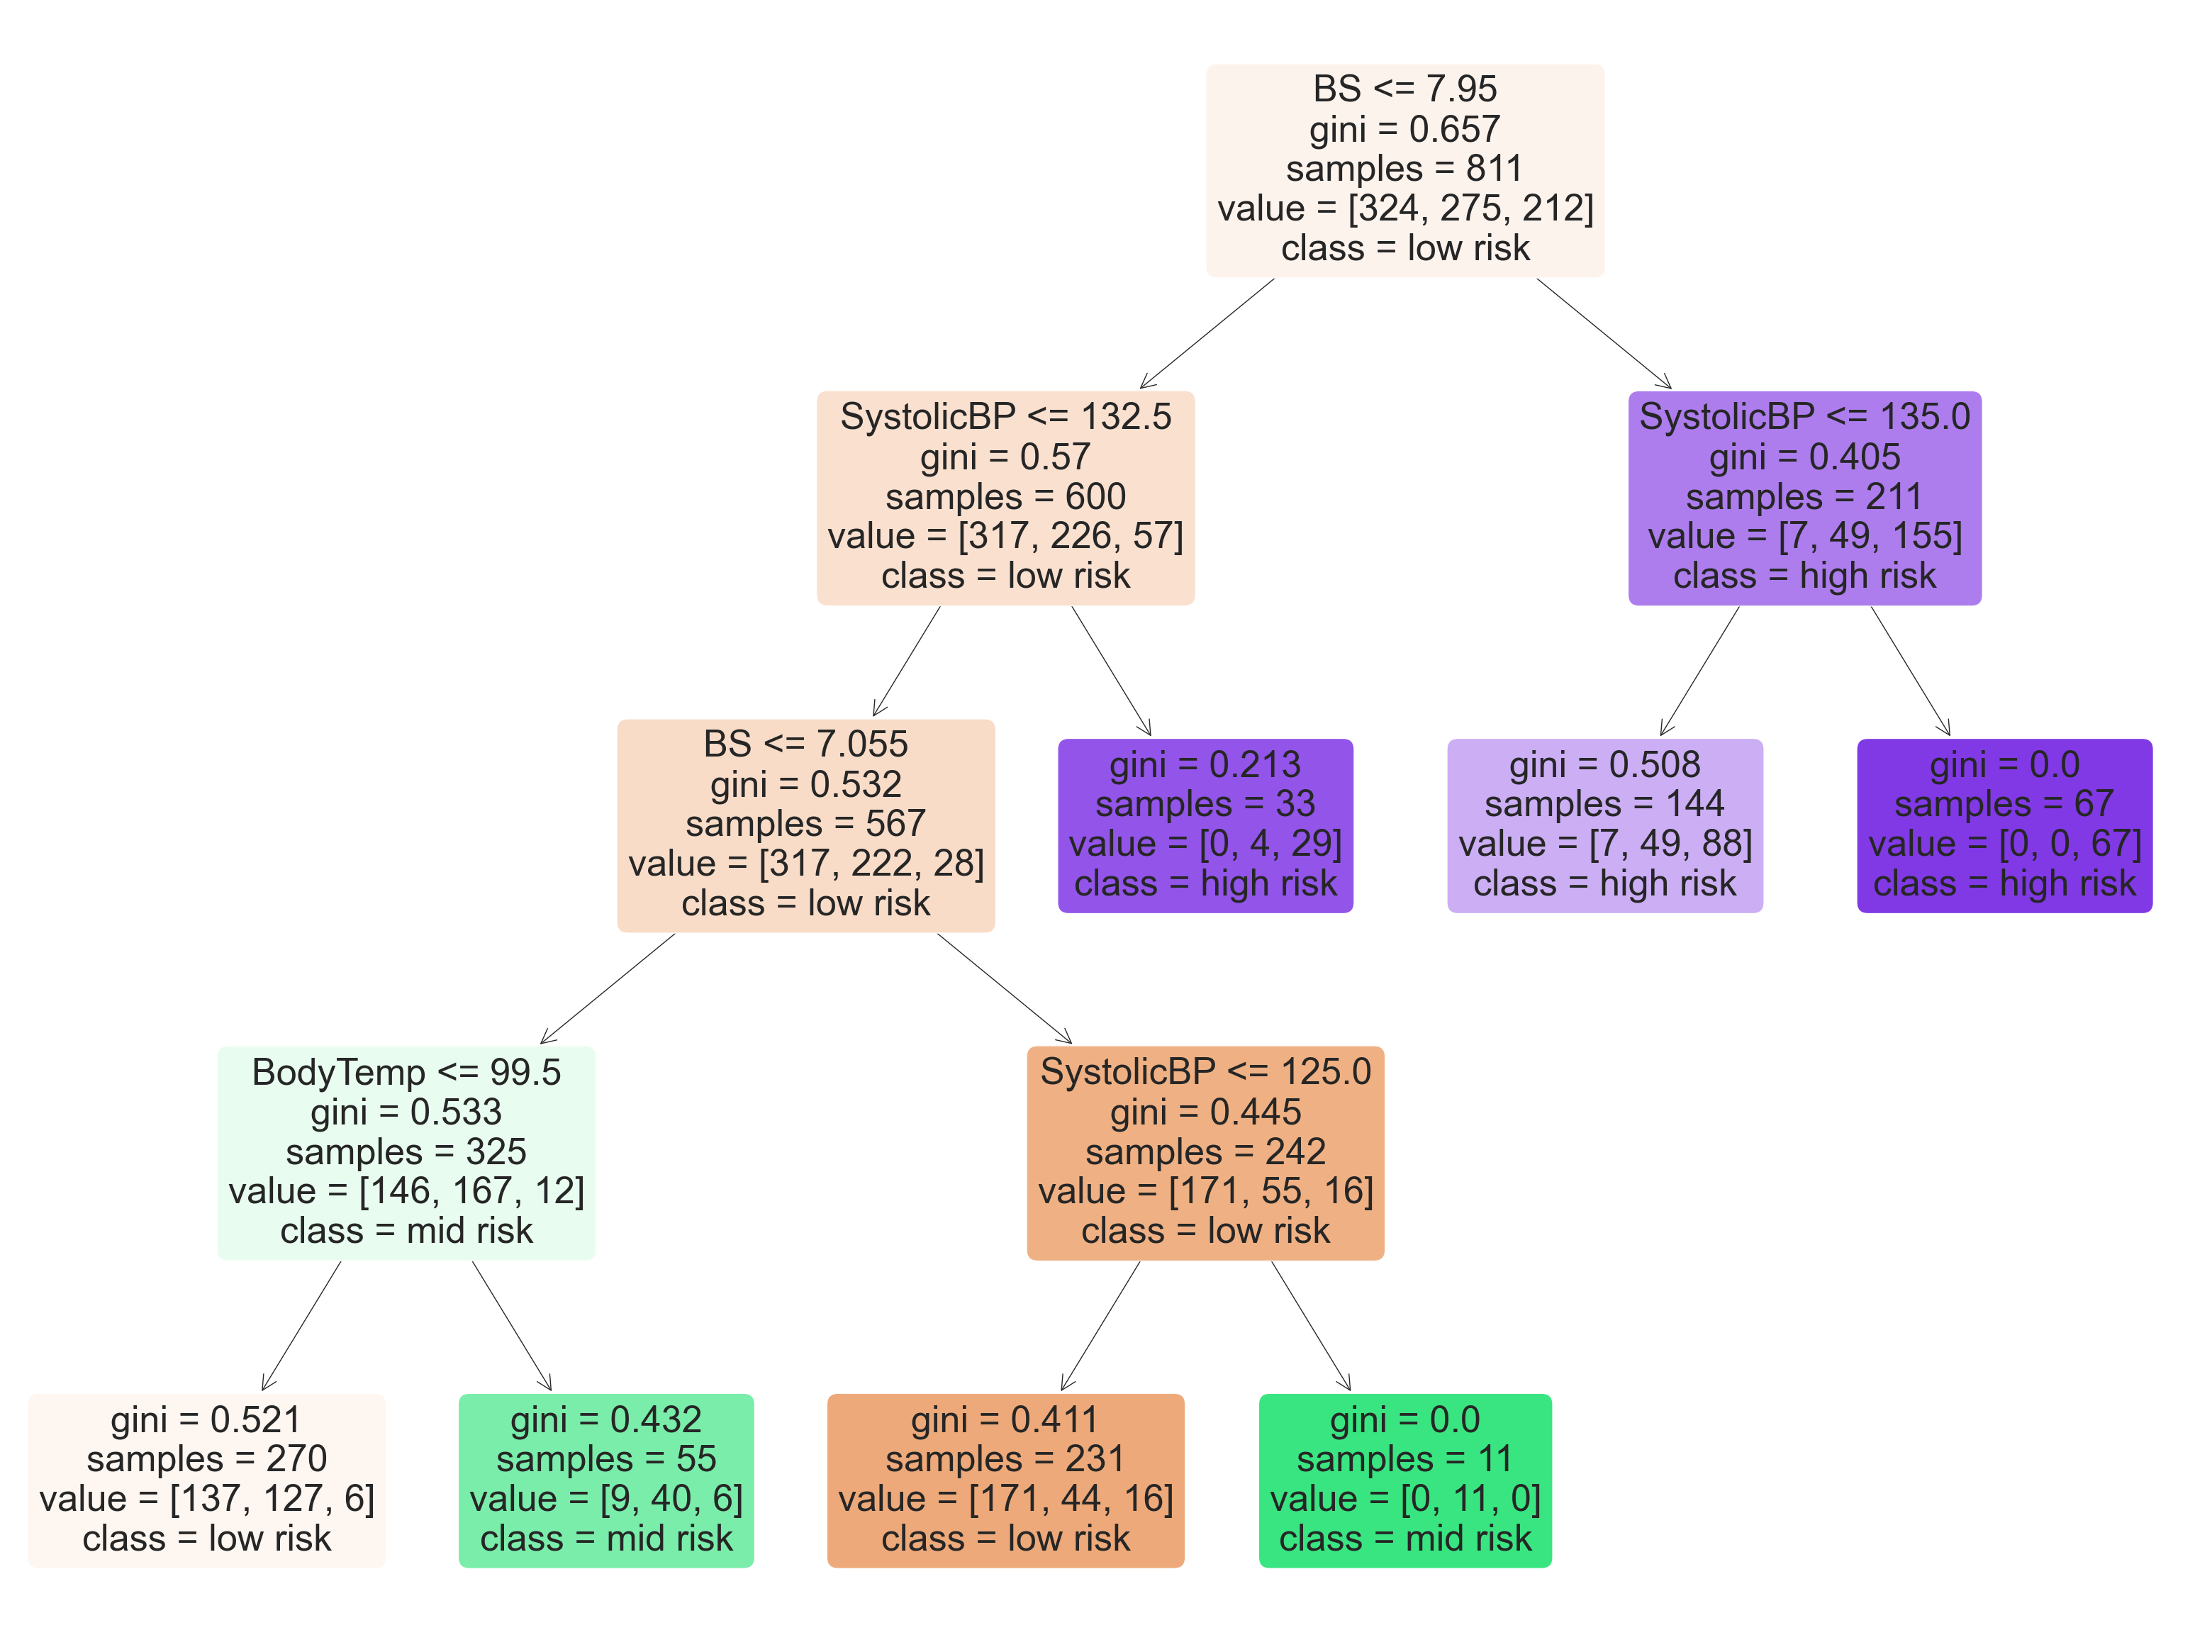

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Split the dataset.

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=30)

# Fit data. 

month1_model = DecisionTreeClassifier(max_depth=4, min_samples_split=150)
month1_model = month1_model.fit(X_train, y_train)

# Check classifier accuracy.

accuracy = month1_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the tree.

feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]
class_names=['low risk','mid risk', "high risk"]
plt.figure(figsize=(40,30))
tree.plot_tree(month1_model,feature_names=feature_names, class_names=['low risk','mid risk', "high risk"],filled=True,rounded=True)
plt.show()

In [10]:
month1_model.predict([[20, 120, 80, 120, 37, 80]])

array([2], dtype=int64)

#### Save the model 

In [11]:
# Save the model.
model_name = "month1_model.pkl"

pickle.dump(month1_model, open(model_name, 'wb'))

____

## Month 2 dataset 

### Data Preprocessing


In [12]:
month2_df.head()

,index,month_no,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0,2,25,128,79.0,18.0,98.0,94,mid risk
1,1,2,35,123,79.0,12.0,98.0,74,mid risk
2,2,2,29,96,74.0,11.0,100.0,90,low risk
3,3,2,30,158,97.0,10.0,98.0,62,high risk
4,4,2,35,139,73.0,6.1,98.0,79,mid risk


In [13]:
# Checking for the null value.

print(month2_df.isna().sum())

# Counting the number of null values.
print(month2_df.isna().sum().sum())

index          0
month_no       0
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64
0


In [14]:
month2_df

,index,month_no,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,0,2,25,128,79.0,18.0,98.0,94,mid risk
1,1,2,35,123,79.0,12.0,98.0,74,mid risk
2,2,2,29,96,74.0,11.0,100.0,90,low risk
3,3,2,30,158,97.0,10.0,98.0,62,high risk
4,4,2,35,139,73.0,6.1,98.0,79,mid risk
...,...,...,...,...,...,...,...,...,...
1009,1009,2,22,100,49.0,13.0,98.0,74,low risk
1010,1010,2,55,140,100.0,19.0,98.0,69,high risk
1011,1011,2,35,70,49.0,18.0,98.0,89,low risk
1012,1012,2,43,109,83.0,19.0,98.0,65,mid risk


In [15]:
month2_df.columns

Index(['index', 'month_no', 'Age', 'SystolicBP', 'DiastolicBP', 'BS',
       'BodyTemp', 'HeartRate', 'RiskLevel'],
      dtype='object')

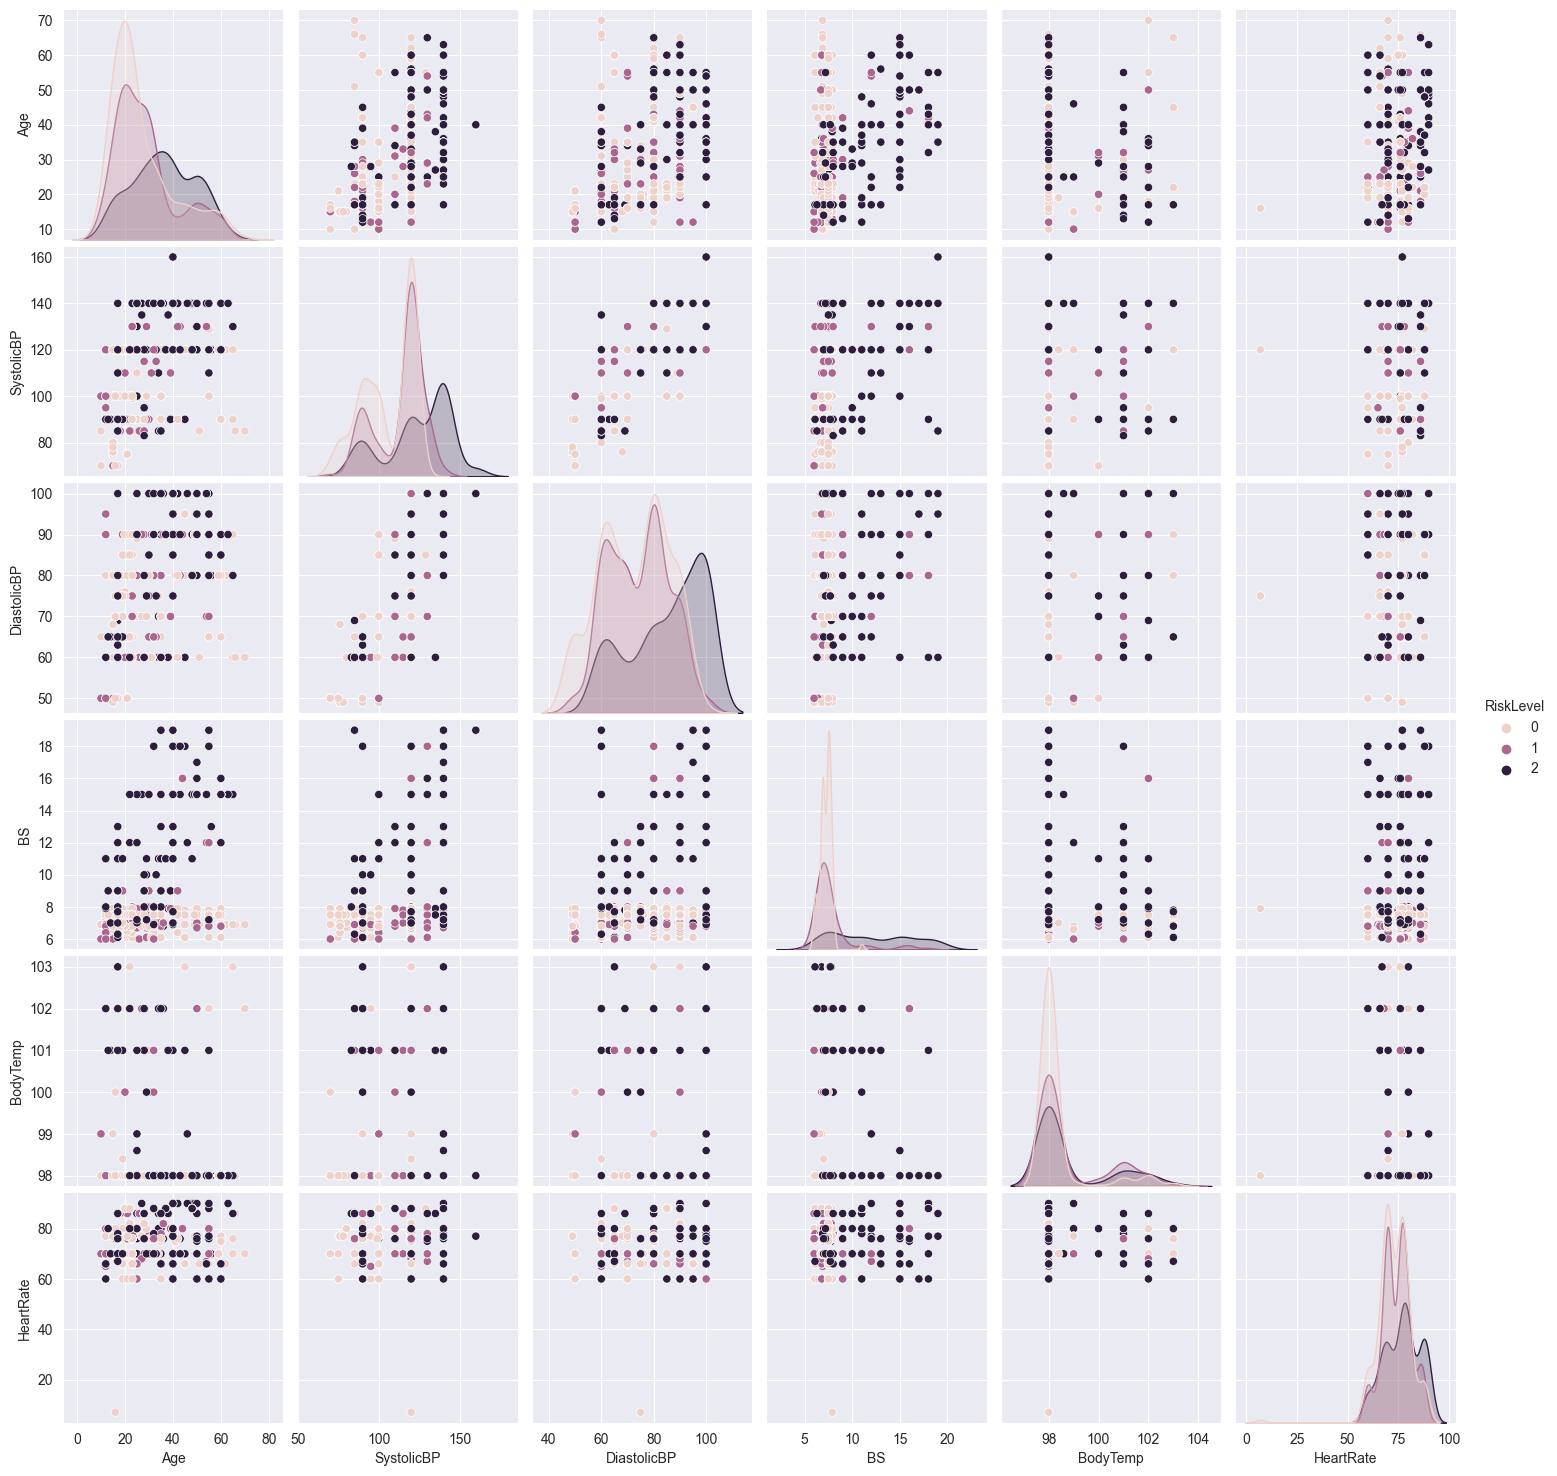

In [16]:
sns.set_style('darkgrid')
cols_to_plot = list(month2_df.columns)
cols_to_plot.remove("index")
cols_to_plot.remove("month_no")
sns.pairplot(month1_df[cols_to_plot], diag_kws={'color':'#03C988'}, hue="RiskLevel", hue_order=["mid risk", "high risk", "low risk"])

In [17]:
# change the values is the RiskLevel column to 0, 1, 2
month2_df['RiskLevel'] = month2_df['RiskLevel'].map(risk_level_dict)

In [18]:
# Independent variables (drop index_col).

X = month2_df.drop(['index', 'RiskLevel',"month_no"], axis=1).values
# print("X:\n", X)

# Dependent variable.
y = month2_df['RiskLevel'].values
# print("y:\n", y)

Accuracy: 0.9950738916256158


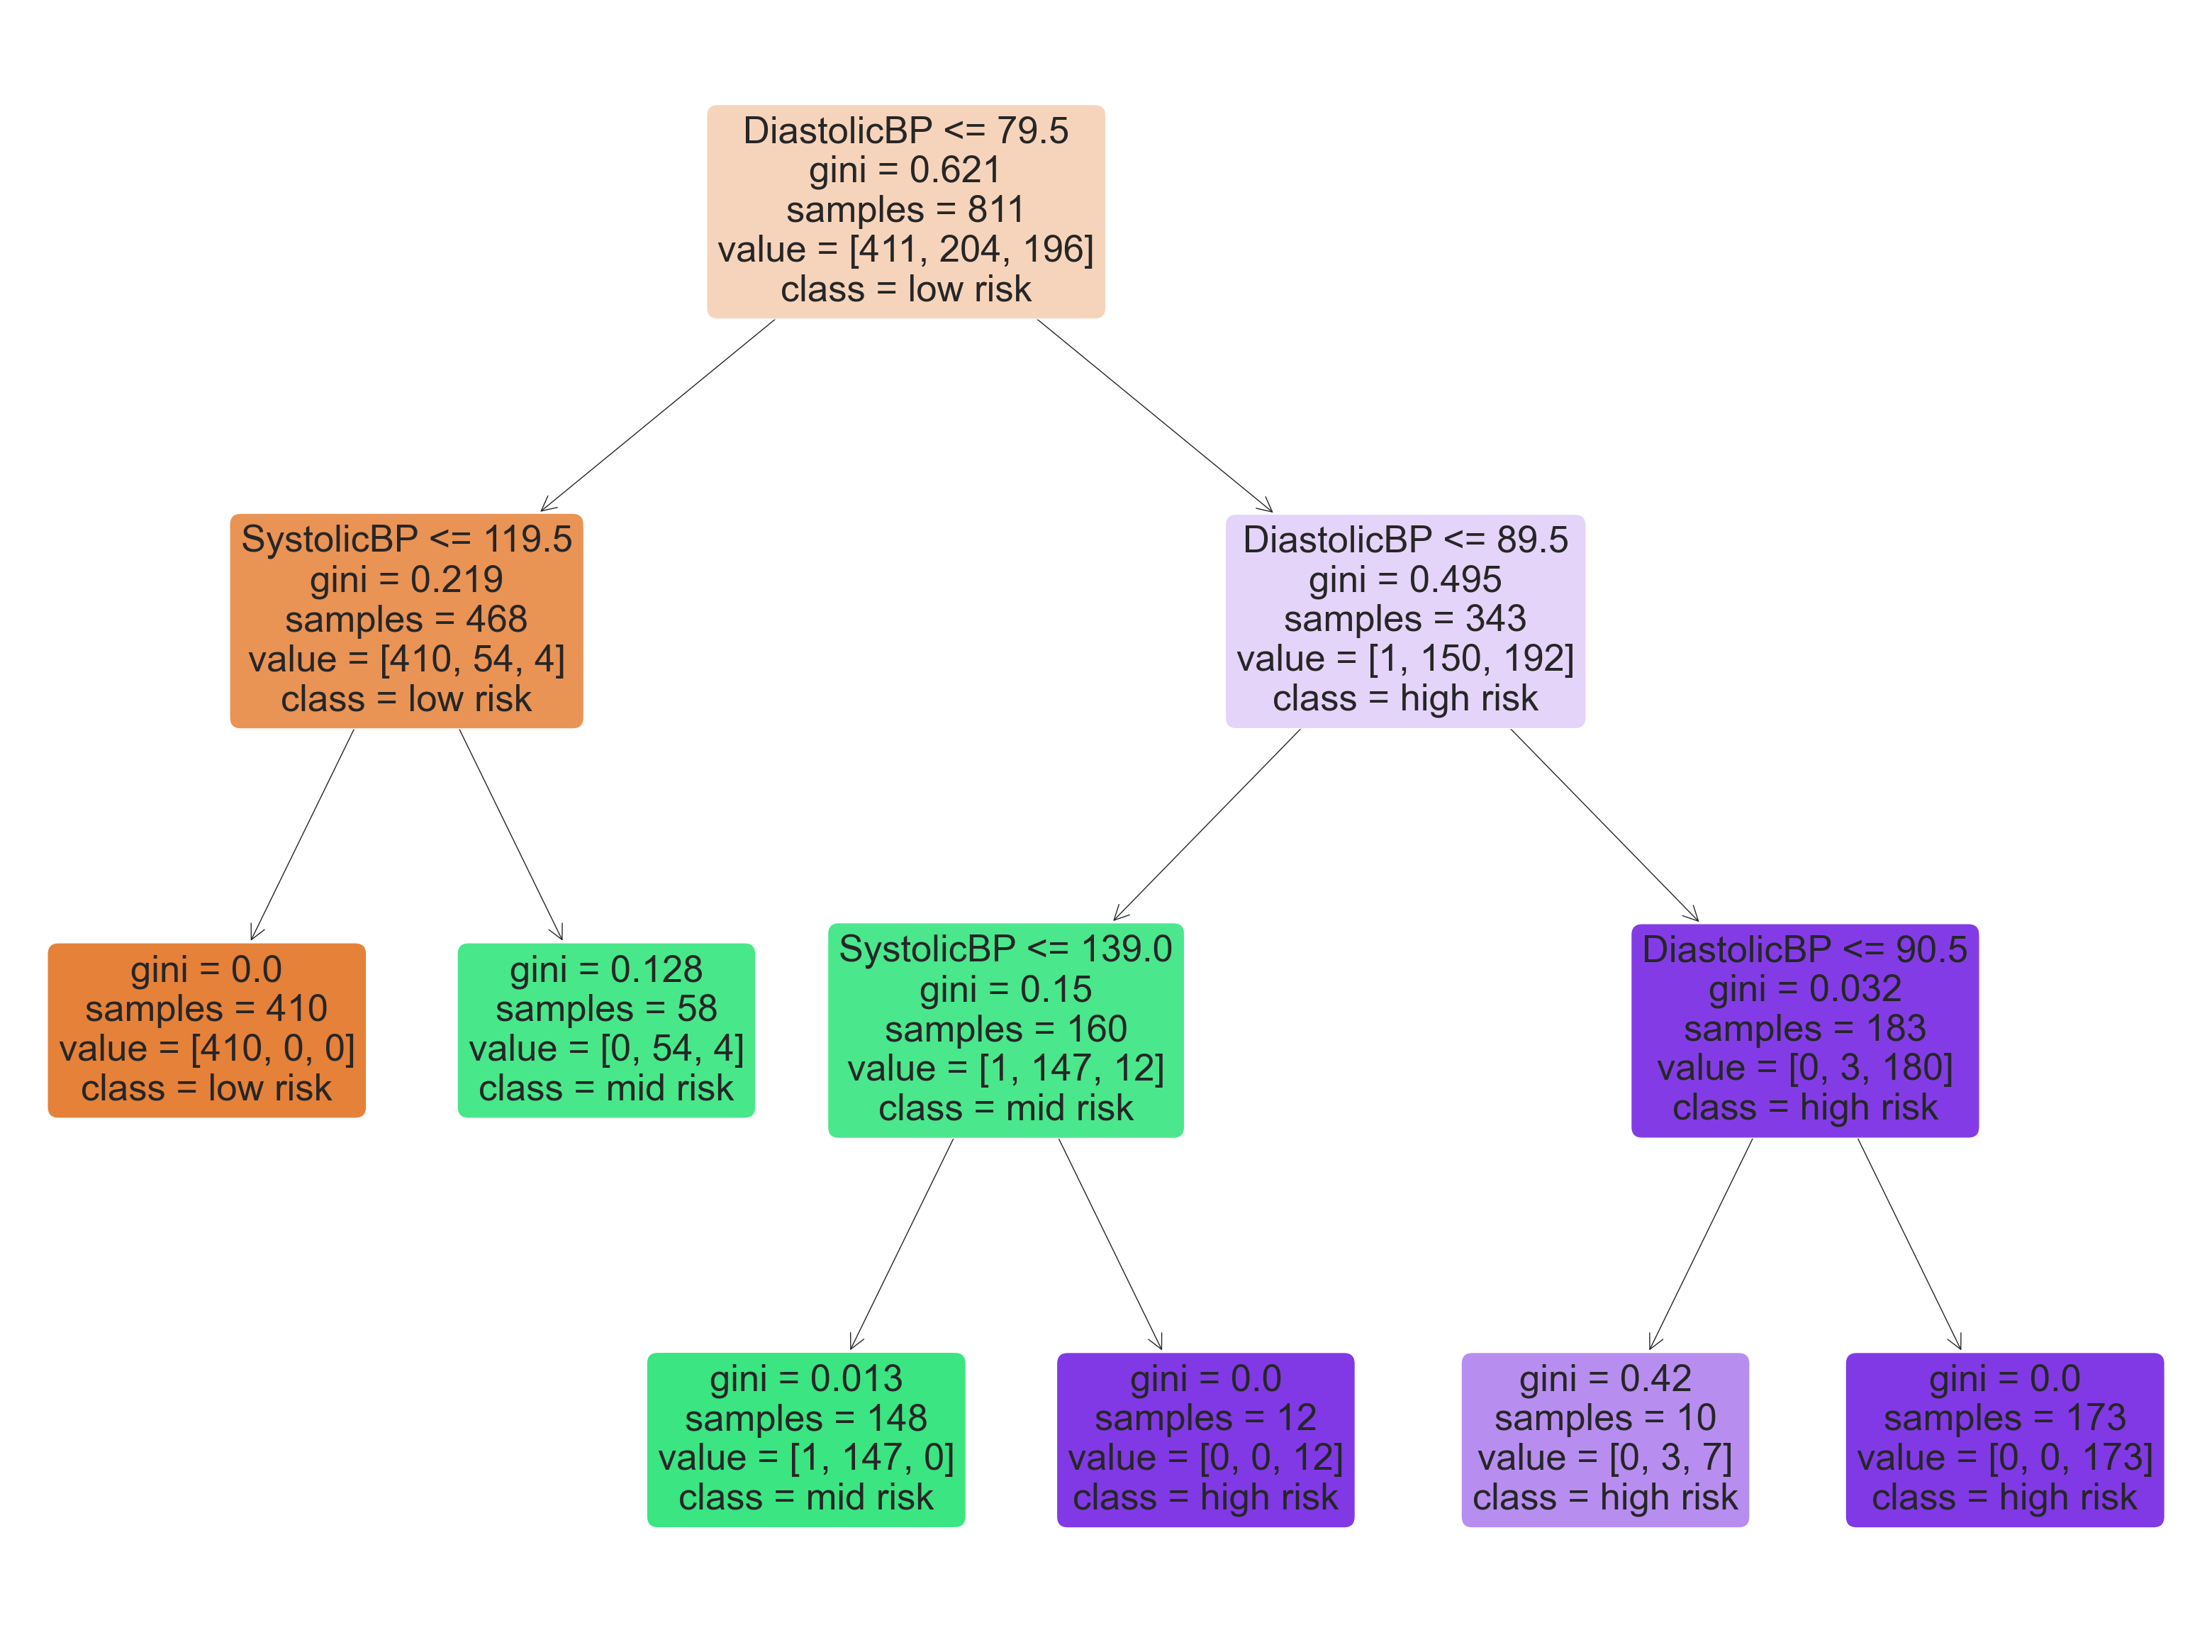

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Split the dataset.

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=30)

# Fit data. 

month2_model = DecisionTreeClassifier(max_depth=4, min_samples_split=150)
month2_model = month1_model.fit(X_train, y_train)

# Check classifier accuracy.

accuracy = month1_model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Plot the tree.

feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]
class_names=['low risk','mid risk', "high risk"]
plt.figure(figsize=(40,30))
tree.plot_tree(month1_model,feature_names=feature_names, class_names=['low risk','mid risk', "high risk"],filled=True,rounded=True)
plt.show()

In [20]:
month2_model.predict([[20, 120, 80, 120, 37, 80]])

array([1], dtype=int64)

In [21]:
# Save the model.
model_name = "month2_model.pkl"

pickle.dump(month2_model, open(model_name, 'wb'))

____